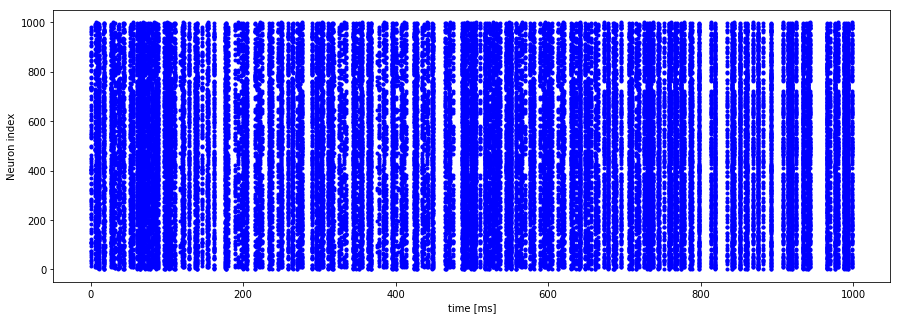

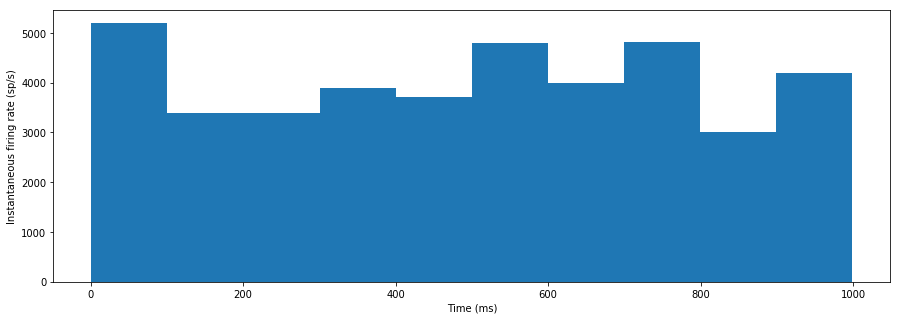

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 1000*ms
num_inputs = 20
rates = '(20*Hz)'
weight = 0.1
N = 1000

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)

# print("Number of spikes: %s" % spikemon.count[:])
# print("Spike times: %s" % spikemon.t[:])

fig = figure(figsize=(15, 5))
plt.plot(spikemon.t/b2.ms, spikemon.i, '.b')
plt.xlabel('time [ms]')
plt.ylabel('Neuron index')

fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms)
plt.xlabel('Time (ms)')
plt.ylabel('Instantaneous firing rate (sp/s)');

plt.show()

Missing compiler_cxx fix for MSVCCompiler
Missing compiler_cxx fix for MSVCCompiler


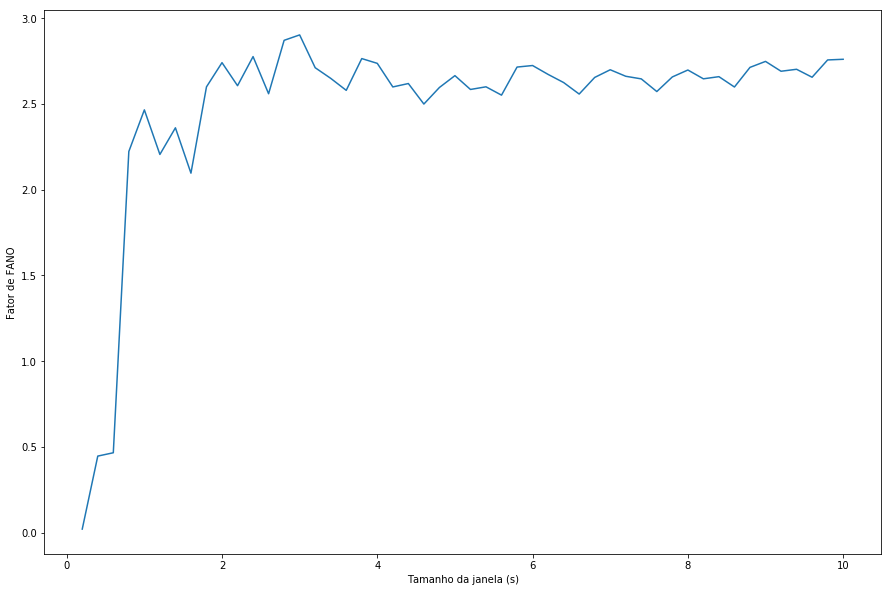

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 1000

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()

aux=[]
win = []
fano = []
for k in range(50):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    
    b2.run(200*b2.ms)
    win.append(200000*ms*(k+1)*ms)
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    var = np.var(aux)
    fano.append(var/mean)
plt.figure(figsize=(15,10))
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (s)')
plt.ylabel('Fator de FANO')
plt.show()


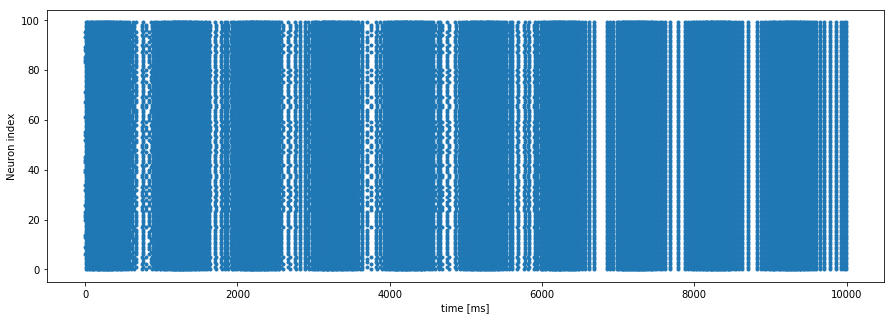

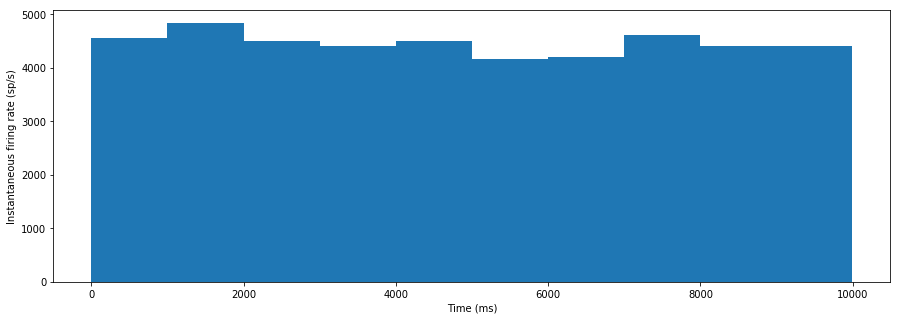

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 100

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()

statemon = StateMonitor(G, 'v', record=True) # monitor de potencial
spikemon = SpikeMonitor(G, 'v') # monitor de spikes
# Run it and store the output firing rate in the list
run(simulation_time)
# 
# print("Number of spikes: %s" % spikemon.count[:])
# print("Spike times: %s" % spikemon.t[:])

fig = figure(figsize=(15, 5))
plt.plot(spikemon.t/b2.ms, spikemon.i, '.')
plt.xlabel('time [ms]')
plt.ylabel('Neuron index')

fig = figure(figsize=(15, 5))
_ = hist(spikemon.t/ms)
plt.xlabel('Time (ms)')
plt.ylabel('Instantaneous firing rate (sp/s)');

plt.show()



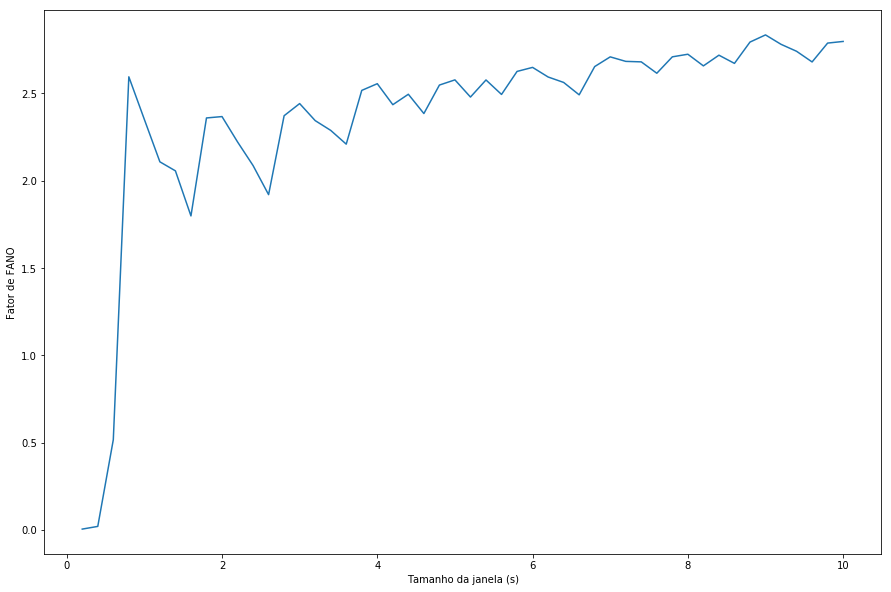

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
import math
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

start_scope() 
# Descrição dos parâmetros
tau = 500*ms
simulation_time = 10000*ms
num_inputs = 20
rates = '(25*Hz+20*sin(2*pi*t*1*Hz)*1*Hz)'
weight = 0.1
N = 100

# Use this list to store output rates
output_rates = []

# Constructing the network 
P = PoissonGroup(num_inputs, rates=rates, dt = 0.1*ms)

# Descrição do modelo neurônio 
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')

statemon = StateMonitor(G, ["v"], record=True) # monitor de potencial
spikemon = SpikeMonitor(G, variables='v') # monitor de spikes
G.v = 'rand()'

S = Synapses(P, G, on_pre='v += weight')
S.connect()


aux=[]
win = []
fano = []
for k in range(50):
    state_monitor = b2.StateMonitor(G, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(G)
    
    b2.run(200*b2.ms)
    win.append(200000*ms*(k+1)*ms)
    aux.append(spike_monitor.count[:])
    mean = np.mean(aux)
    var = np.var(aux)
    fano.append(var/mean)
plt.figure(figsize=(15,10))
plt.plot(win, fano)
plt.xlabel('Tamanho da janela (s)')
plt.ylabel('Fator de FANO')
plt.show()